
# Flight Fare Prediction

# Task 1

## Introduction:
The dataset provides insights into flight fare prediction for various airlines, encompassing features such as airline, date of journey, source and destination cities, route, departure and arrival times, duration, total stops, additional information, and ticket price.

## Summary Statistics:
With 10,683 rows and 11 columns, the dataset spans various airlines including Jet Airways, IndiGo, Air India, Multiple carriers, SpiceJet, Vistara, Air Asia, GoAir, Multiple carriers Premium economy, Jet Airways Business, Vistara Premium economy, and Trujet. Jet Airways emerges as the most common airline.

## Data Cleaning and Preprocessing:
Initial steps involve cleaning and preprocessing the data, including addressing missing values, converting date and time columns, extracting pertinent information from routes, and encoding categorical variables.

## Exploratory Data Analysis (EDA) and Conclusion:
Through EDA, we visualize flight fare distributions across airlines and explore relationships between fare prices and journey date, source, destination, total stops, and additional information. These insights illuminate factors influencing flight fare prices, aiding in accurate fare prediction.

## Insights:
- The distribution of fare prices varies across airlines, with some airlines commanding higher prices.
- Journey dates and times, along with route details and stopovers, significantly impact fare prices.
- Additional information provided may influence fare pricing, warranting further investigation.

# Conclusion:
By delving into the dataset's nuances, we gain a comprehensive understanding of flight fare prediction dynamics. EDA illuminates key factors influencing fare prices, guiding the development of robust prediction models to enhance pricing accuracy and optimize decision-making in the airline industry.

### Importing Libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_excel('Flight_Fare.xlsx')   ## Loading DataSet
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Basic Checks

In [56]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [57]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [58]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [59]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Basic checks shows us that there is a null value, in columns Route and Total_Stops

In [61]:
df.dropna(inplace=True)

In [62]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Data Preproccessing

## Numerical Columns

### Converting DateTime columns into DateTime format

In [63]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-02-16 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-16 05:50:00,2024-02-16 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-16 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-02-16 18:05:00,2024-02-16 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-02-16 16:50:00,2024-02-16 21:35:00,4h 45m,1 stop,No info,13302


#### After an extensive research on Domain with respect to data, it is observed that year is irrelevant to the target variable, therefore we will be proceeding without year and taking only Month and Day as features

In [64]:
df['DayJourney']=df['Date_of_Journey'].dt.day
df['MonthJourney']=df['Date_of_Journey'].dt.month
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayJourney,MonthJourney
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-02-16 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-16 05:50:00,2024-02-16 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-16 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-02-16 18:05:00,2024-02-16 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-02-16 16:50:00,2024-02-16 21:35:00,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2024-02-16 19:55:00,2024-02-16 22:25:00,2h 30m,non-stop,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2024-02-16 20:45:00,2024-02-16 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2024-02-16 08:20:00,2024-02-16 11:20:00,3h,non-stop,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2024-02-16 11:30:00,2024-02-16 14:10:00,2h 40m,non-stop,No info,12648,3,1


In [65]:
df.drop('Date_of_Journey', axis=1, inplace=True)   ## Dropping DateofJourney column
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayJourney,MonthJourney
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-02-16 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-16 05:50:00,2024-02-16 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-16 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-02-16 18:05:00,2024-02-16 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-02-16 16:50:00,2024-02-16 21:35:00,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2024-02-16 19:55:00,2024-02-16 22:25:00,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,2024-02-16 20:45:00,2024-02-16 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2024-02-16 08:20:00,2024-02-16 11:20:00,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2024-02-16 11:30:00,2024-02-16 14:10:00,2h 40m,non-stop,No info,12648,3,1


### Extracting hours and minutes from Departure and Arrival columns

In [66]:
def extract_hour(data,col):
    data[col+'_Hour']=data[col].dt.hour

def extract_min(data,col):
    data[col+'_Min']=data[col].dt.minute
    

In [67]:
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')

extract_hour(df,'Arrival_Time')
extract_min(df, 'Arrival_Time')

In [68]:
df.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,DayJourney,MonthJourney,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


In [69]:
df.Duration=pd.to_timedelta(df.Duration) ## Since Duration column is in object form and is part string and part int, 
df.Duration.info()                       # using TimeDelta to convert instead of DateTime

<class 'pandas.core.series.Series'>
Int64Index: 10682 entries, 0 to 10682
Series name: Duration
Non-Null Count  Dtype          
--------------  -----          
10682 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 166.9 KB


In [70]:
# Function for extracting hour and minute from timedelta
def extract_hour_minute(data, col):
    data[col + '_Hour'] = data[col].dt.components['hours']
    data[col + '_Minute'] = data[col].dt.components['minutes']

# Call function to extract hour and minute from 'Duration'
extract_hour_minute(df, 'Duration')
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,DayJourney,MonthJourney,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0 days 02:50:00,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,0 days 07:25:00,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,0 days 19:00:00,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,0 days 05:25:00,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,0 days 04:45:00,1 stop,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0 days 02:30:00,non-stop,No info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,0 days 02:35:00,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0 days 03:00:00,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0 days 02:40:00,non-stop,No info,12648,3,1,11,30,14,10,2,40


In [71]:
df.drop(columns=['Duration'],inplace=True)
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,DayJourney,MonthJourney,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,2,40


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Route              10682 non-null  object
 4   Total_Stops        10682 non-null  object
 5   Additional_Info    10682 non-null  object
 6   Price              10682 non-null  int64 
 7   DayJourney         10682 non-null  int64 
 8   MonthJourney       10682 non-null  int64 
 9   Dep_Time_Hour      10682 non-null  int64 
 10  Dep_Time_Min       10682 non-null  int64 
 11  Arrival_Time_Hour  10682 non-null  int64 
 12  Arrival_Time_Min   10682 non-null  int64 
 13  Duration_Hour      10682 non-null  int64 
 14  Duration_Minute    10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


### All the numerical columns have been converted into int format

### Categorical Columns

In [73]:
cat_col=df.iloc[:,:6]  ## Seperating numerical and categorical columns 
num_col=df.iloc[:,6:]
cat_col

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


#### Checking individual effects of categorical columns on target variable

In [74]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

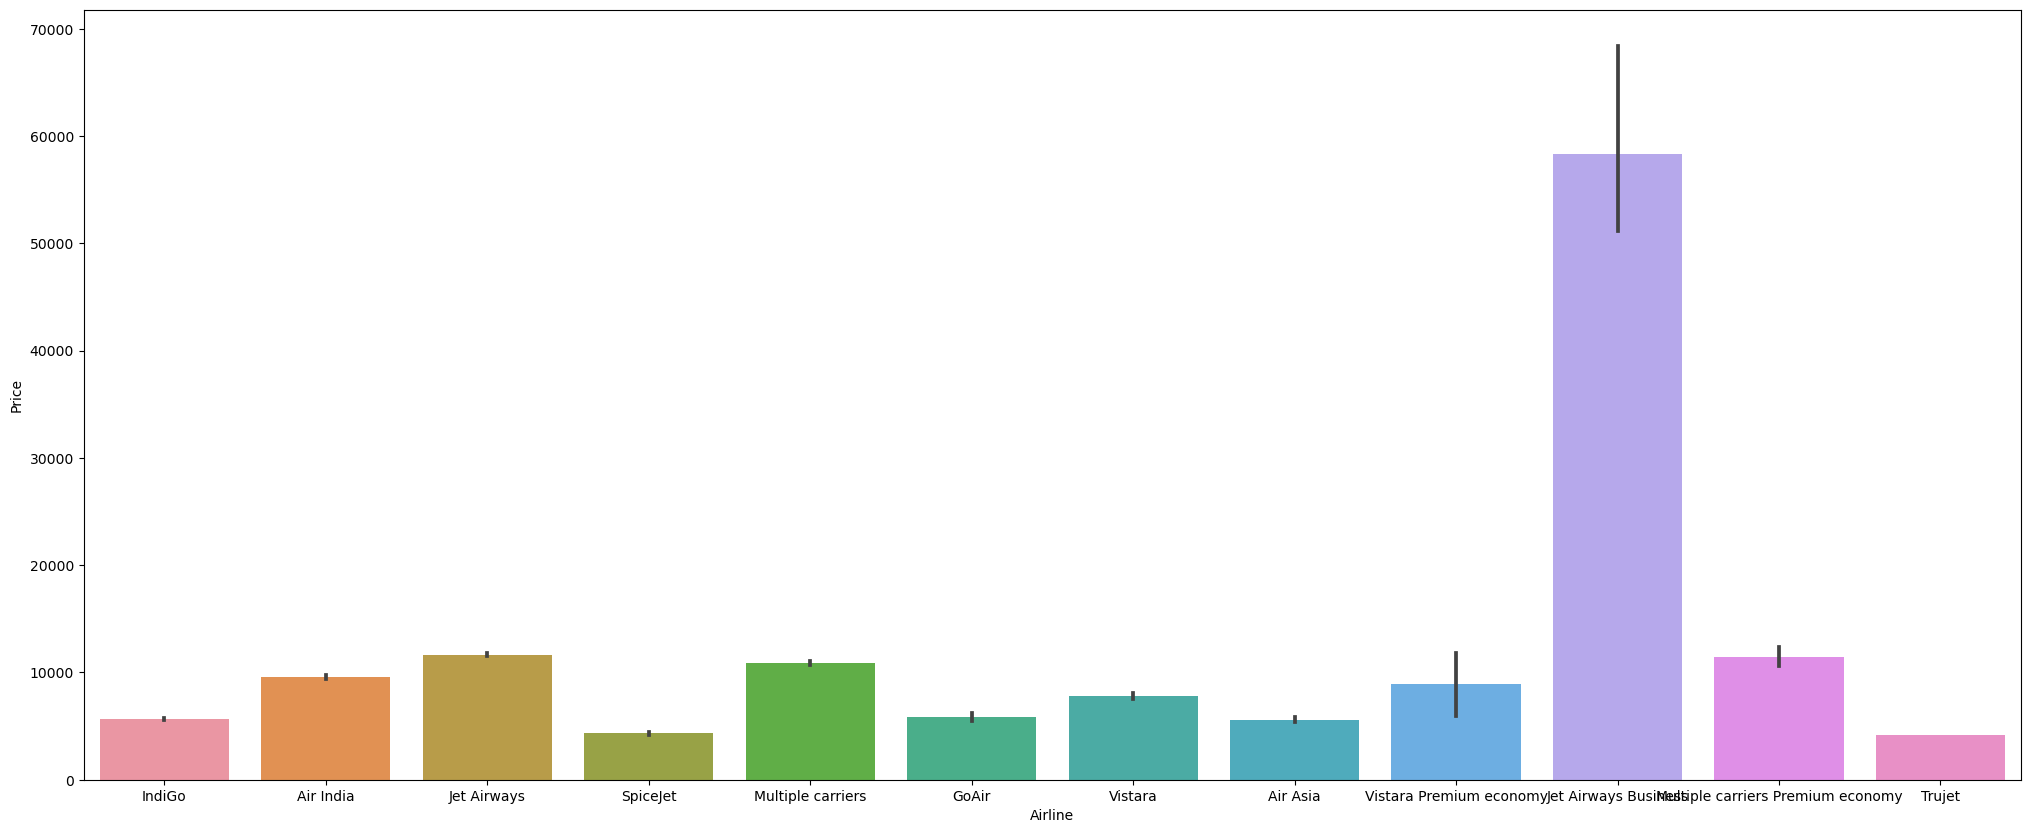

In [75]:
plt.figure(figsize=(25,10))
sns.barplot(x='Airline',y='Price',data=df)

In [76]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Axes: xlabel='Source', ylabel='Price'>

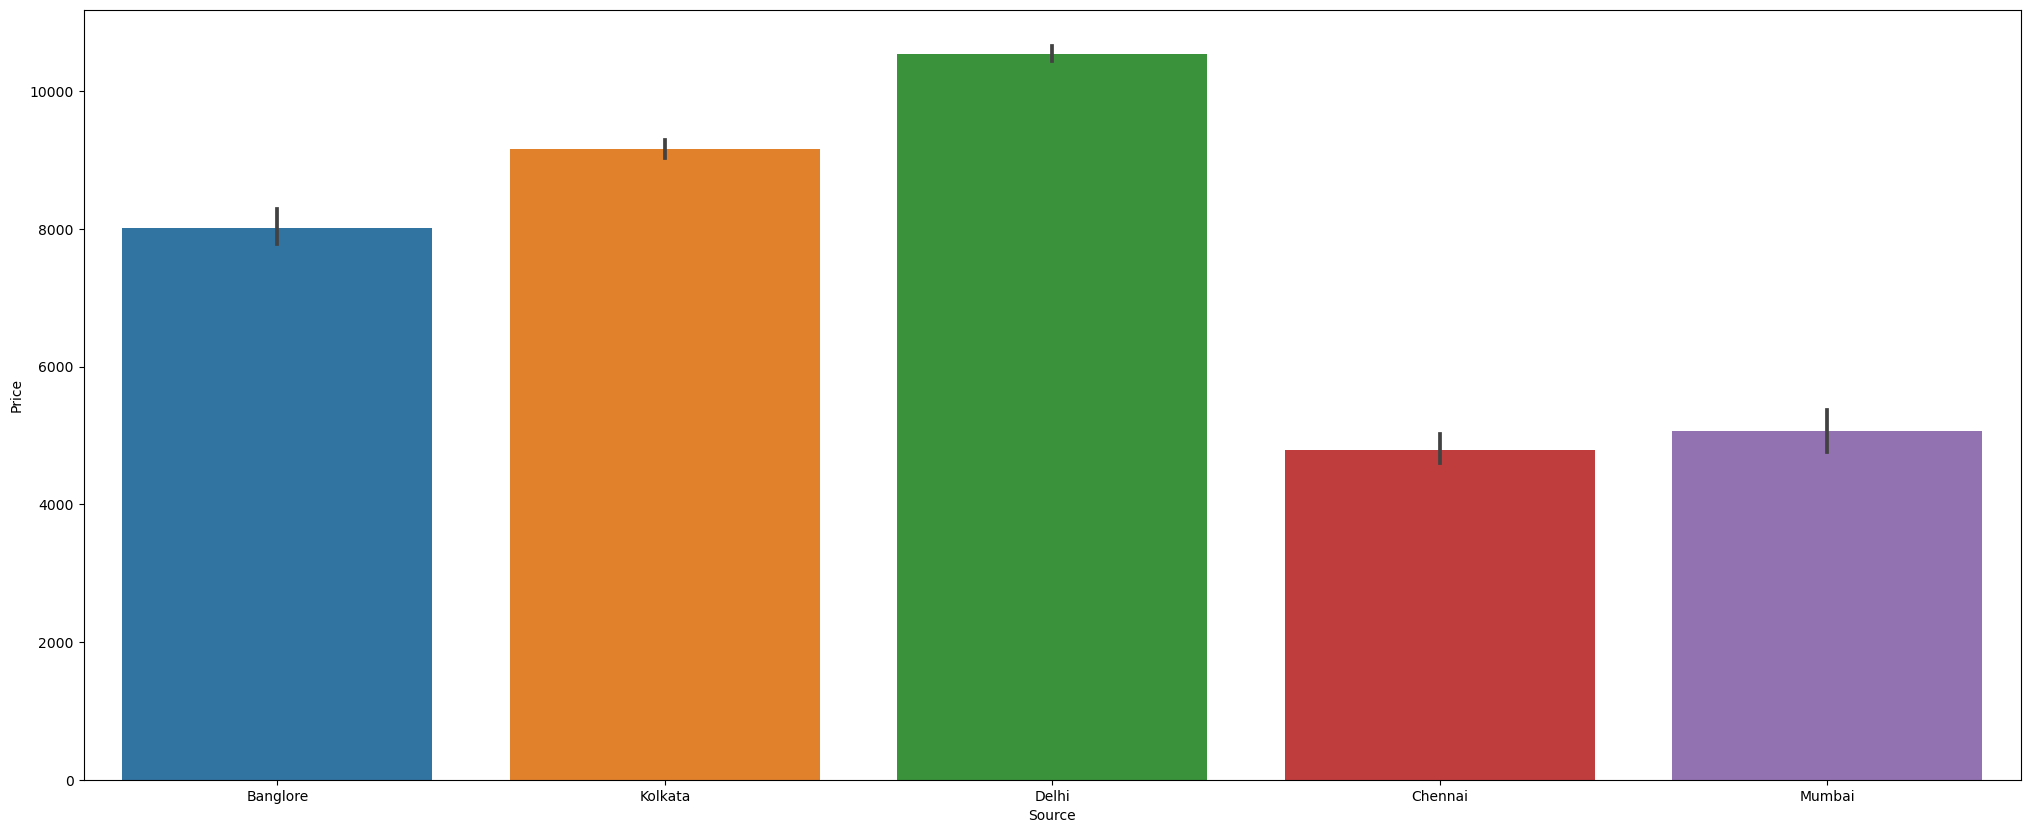

In [77]:
plt.figure(figsize=(25,10))
sns.barplot(x='Source',y='Price',data=df)

In [78]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Axes: xlabel='Destination', ylabel='Price'>

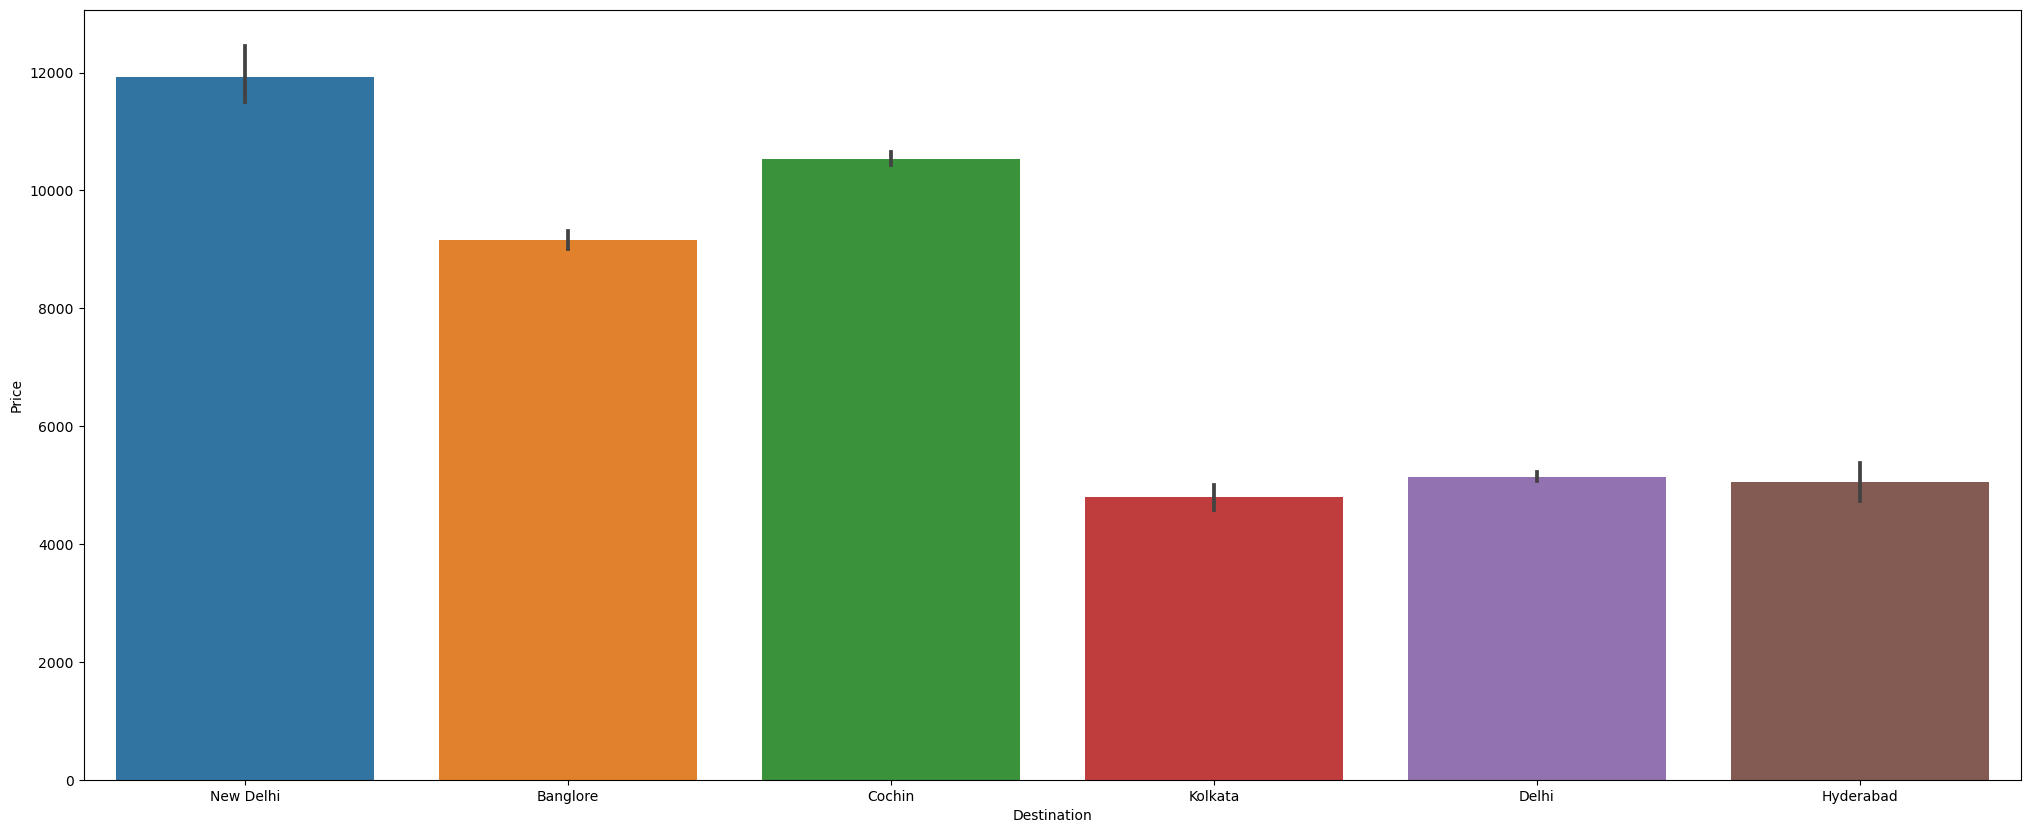

In [79]:
plt.figure(figsize=(25,10))
sns.barplot(x='Destination',y='Price',data=df)

In [80]:
df.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [81]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<Axes: xlabel='Total_Stops', ylabel='Price'>

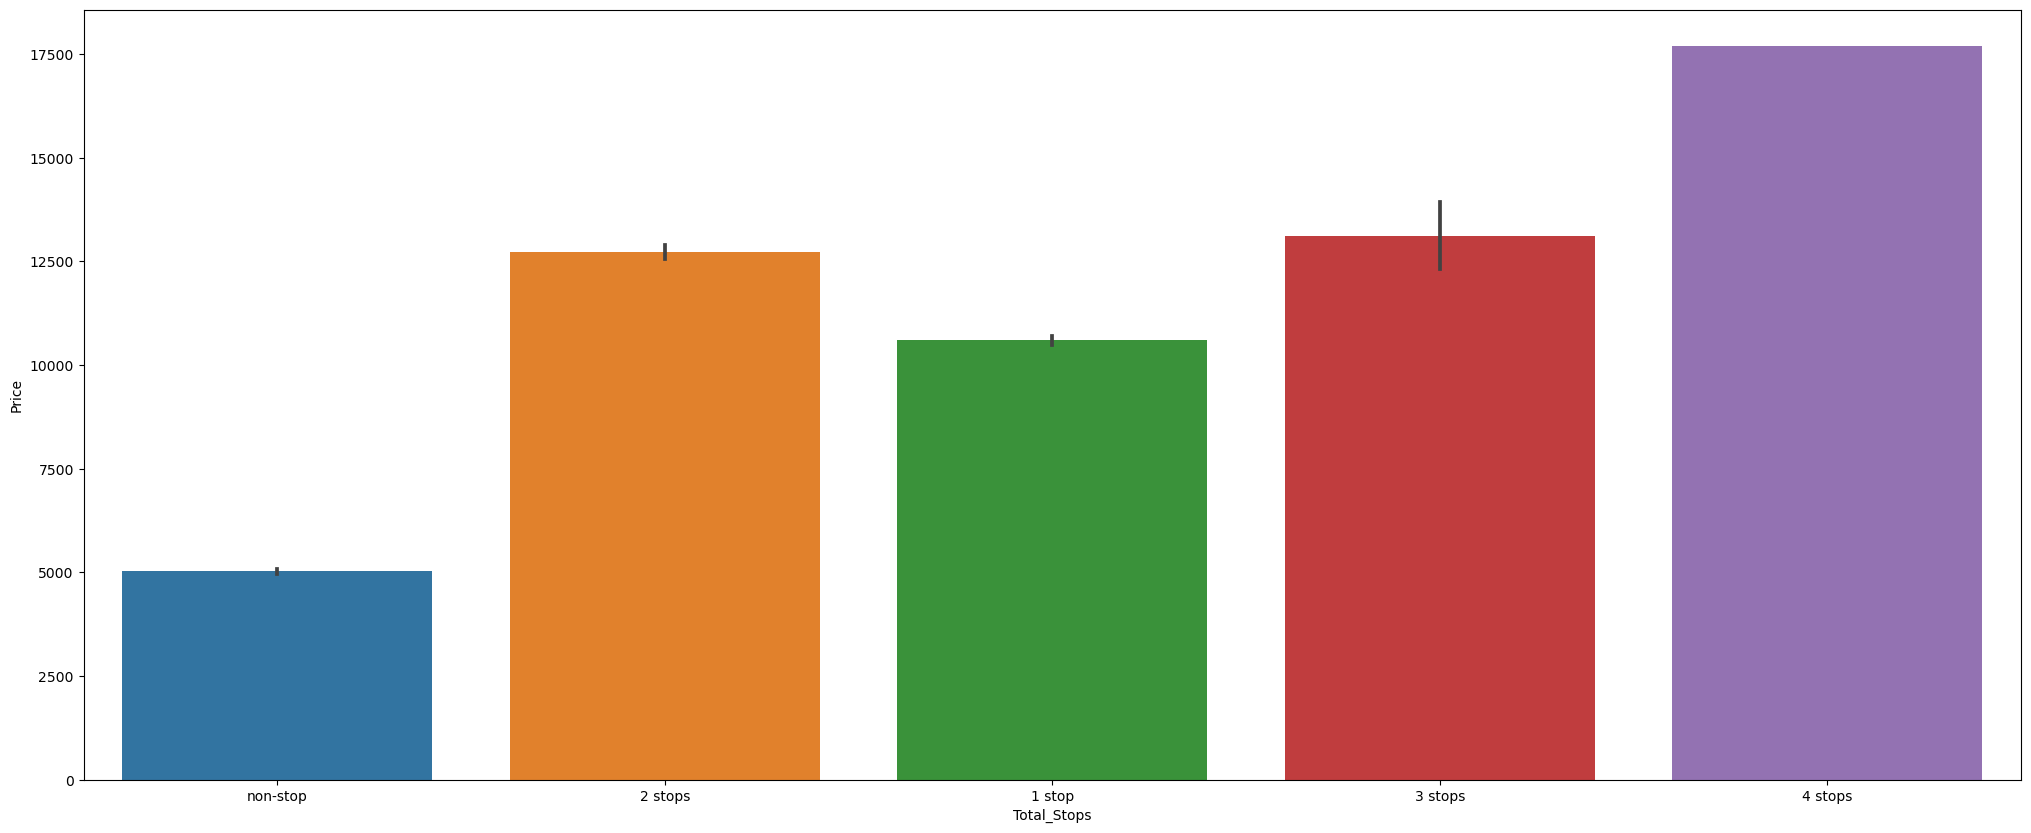

In [82]:
plt.figure(figsize=(25,10))
sns.barplot(x='Total_Stops',y='Price',data=df)

In [83]:
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

<Axes: xlabel='Additional_Info', ylabel='Price'>

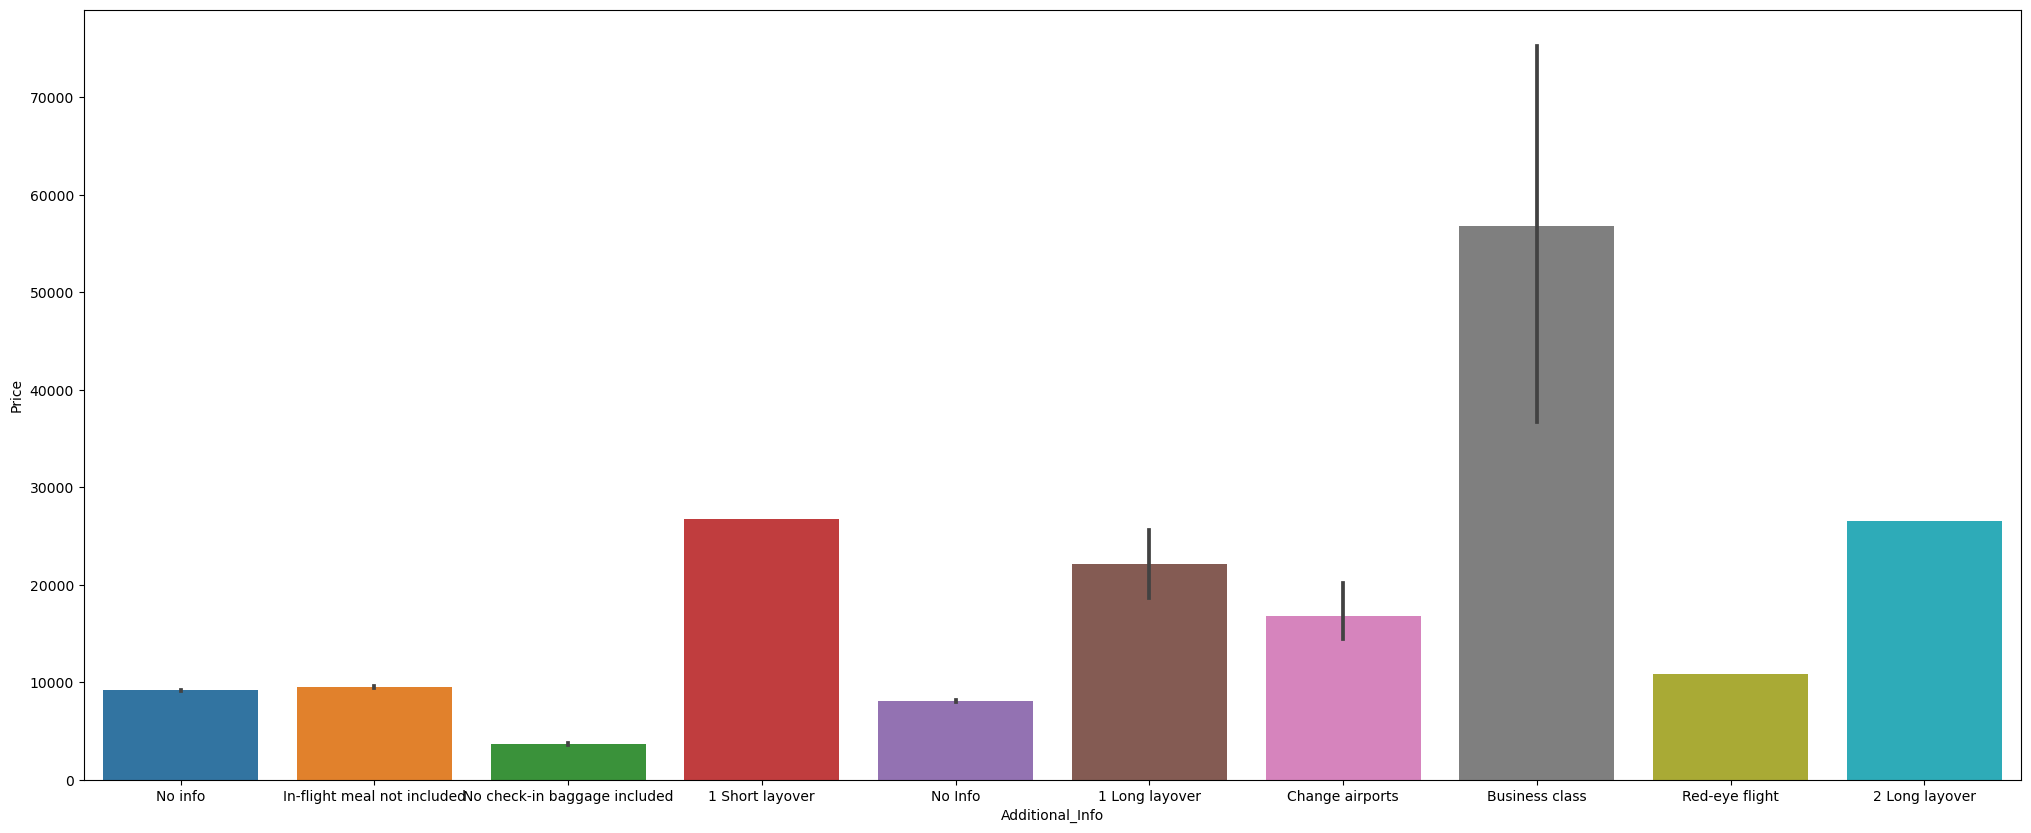

In [84]:
plt.figure(figsize=(25,10))
sns.barplot(x='Additional_Info',y='Price',data=df)

#### Splitting route column into individual stops

In [85]:
cat_col[['Route1', 'Route2', 'Route3', 'Route4', 'Route5']] = cat_col['Route'].str.split('→', n=4, expand=True)
cat_col.drop(columns='Route', inplace=True)

### Using OneHot encoding on the rest of categorical columns 

In [86]:
df1=pd.get_dummies(cat_col['Airline'],drop_first=True)
cat_col= pd.concat([cat_col,df1],axis=1).drop(['Airline'],axis=1)

In [87]:
df1=pd.get_dummies(cat_col['Source'],drop_first=True)
cat_col= pd.concat([cat_col,df1],axis=1).drop(['Source'],axis=1)

In [88]:
df1=pd.get_dummies(cat_col['Destination'], prefix='D_',drop_first=True)
cat_col= pd.concat([cat_col,df1],axis=1).drop(['Destination'],axis=1)

In [89]:
df1=pd.get_dummies(cat_col['Additional_Info'],drop_first=True)
cat_col= pd.concat([cat_col,df1],axis=1).drop(['Additional_Info'],axis=1)

### Converting Total stops using key value pair

In [90]:
cat_col['Total_Stops'].replace({'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}, inplace=True)
cat_col

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,D__New Delhi,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,0,BLR,DEL,None,None,None,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,2,CCU,IXR,BBI,BLR,None,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,DEL,LKO,BOM,COK,None,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,CCU,NAG,BLR,None,None,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,BLR,NAG,DEL,None,None,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,CCU,BLR,None,None,None,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,0,CCU,BLR,None,None,None,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10680,0,BLR,DEL,None,None,None,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10681,0,BLR,DEL,None,None,None,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [91]:
cat_col.isnull().sum()

Total_Stops                              0
Route1                                   0
Route2                                   0
Route3                                3491
Route4                                9116
Route5                               10636
Air India                                0
GoAir                                    0
IndiGo                                   0
Jet Airways                              0
Jet Airways Business                     0
Multiple carriers                        0
Multiple carriers Premium economy        0
SpiceJet                                 0
Trujet                                   0
Vistara                                  0
Vistara Premium economy                  0
Chennai                                  0
Delhi                                    0
Kolkata                                  0
Mumbai                                   0
D__Cochin                                0
D__Delhi                                 0
D__Hyderaba

### Before proceeding with encoding Routes, we need to fill Null values with NA in columns Route3, Route4, Route5

In [92]:
for i in ['Route3', 'Route4', 'Route5']:
    cat_col[i].fillna('NA',inplace=True)
cat_col

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,D__New Delhi,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,0,BLR,DEL,NA,NA,NA,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,2,CCU,IXR,BBI,BLR,NA,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,DEL,LKO,BOM,COK,NA,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,CCU,NAG,BLR,NA,NA,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,BLR,NAG,DEL,NA,NA,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,CCU,BLR,NA,NA,NA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,0,CCU,BLR,NA,NA,NA,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10680,0,BLR,DEL,NA,NA,NA,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10681,0,BLR,DEL,NA,NA,NA,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [93]:
cat_col.isnull().sum()

Total_Stops                          0
Route1                               0
Route2                               0
Route3                               0
Route4                               0
Route5                               0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
D__Cochin                            0
D__Delhi                             0
D__Hyderabad                         0
D__Kolkata                           0
D__New Delhi             

### Using LabelEncoder on Route columns

In [94]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    cat_col[i]=label_encoder.fit_transform(cat_col[i])
cat_col

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,D__New Delhi,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,0,0,13,29,13,5,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,2,2,25,1,3,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,3,32,4,5,5,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,2,34,3,13,5,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,34,8,13,5,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,0,2,5,29,13,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10680,0,0,13,29,13,5,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10681,0,0,13,29,13,5,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [95]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Route1                             10682 non-null  int32
 2   Route2                             10682 non-null  int32
 3   Route3                             10682 non-null  int32
 4   Route4                             10682 non-null  int32
 5   Route5                             10682 non-null  int32
 6   Air India                          10682 non-null  uint8
 7   GoAir                              10682 non-null  uint8
 8   IndiGo                             10682 non-null  uint8
 9   Jet Airways                        10682 non-null  uint8
 10  Jet Airways Business               10682 non-null  uint8
 11  Multiple carriers                  10682 non-null  uint8
 12  Multiple carriers 

In [96]:
num_col

,Price,DayJourney,MonthJourney,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_Hour,Duration_Minute
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


### Now that all the features has been converted into numerical Datatypes, concating them as one

In [97]:
df=pd.concat([num_col,cat_col],axis=1)
df

,Price,DayJourney,MonthJourney,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_Hour,Duration_Minute,Total_Stops,...,D__New Delhi,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,3897,24,3,22,20,1,10,2,50,0,...,1,0,0,0,0,0,0,0,1,0
1,7662,5,1,5,50,13,15,7,25,2,...,0,0,0,0,0,0,0,0,1,0
2,13882,6,9,9,25,4,25,19,0,2,...,0,0,0,0,0,0,0,0,1,0
3,6218,5,12,18,5,23,30,5,25,1,...,0,0,0,0,0,0,0,0,1,0
4,13302,3,1,16,50,21,35,4,45,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30,0,...,0,0,0,0,0,0,0,0,1,0
10679,4145,27,4,20,45,23,20,2,35,0,...,0,0,0,0,0,0,0,0,1,0
10680,7229,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,0,0,0,1,0
10681,12648,3,1,11,30,14,10,2,40,0,...,1,0,0,0,0,0,0,0,1,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Price                              10682 non-null  int64
 1   DayJourney                         10682 non-null  int64
 2   MonthJourney                       10682 non-null  int64
 3   Dep_Time_Hour                      10682 non-null  int64
 4   Dep_Time_Min                       10682 non-null  int64
 5   Arrival_Time_Hour                  10682 non-null  int64
 6   Arrival_Time_Min                   10682 non-null  int64
 7   Duration_Hour                      10682 non-null  int64
 8   Duration_Minute                    10682 non-null  int64
 9   Total_Stops                        10682 non-null  int64
 10  Route1                             10682 non-null  int32
 11  Route2                             10682 non-null  int32
 12  Route3            

### Using SweetViz to analyze correlation between features and Target variable and detect outliers

In [ ]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(df)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Text(0.5, 0, 'Price')

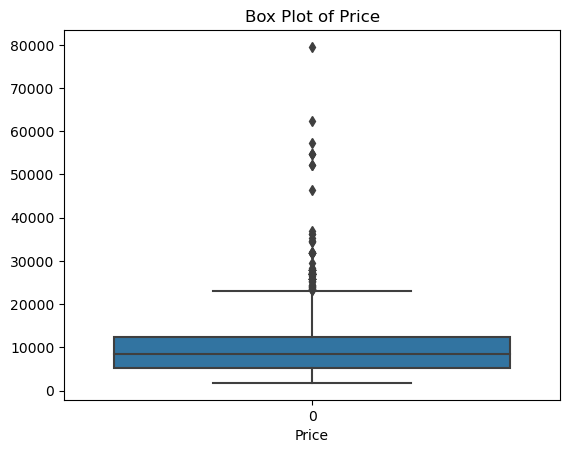

In [414]:
sns.boxplot(data=df.Price)
plt.title('Box Plot of Price')
plt.xlabel('Price')

### Since target variable has some outliers imputing them with the Median value

In [50]:
df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])

### Since most of the features have been encoded and/or broken down, SweetViz report shows us that all the features collectively influence the Target Variable, so proceeding ahead with Model Creation

## Model Creation

In [98]:
## target predictor seperation
X=df.iloc[:,1:]
y=df.Price

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

## Random Forest

In [418]:
#model creation 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [419]:
y_pred=model.predict(X_test)

In [106]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

NameError: name 'y_pred' is not defined

### Model shows that Random Forest is performing efficiently on the data, with an accuracy of 91.6% hyper tuning the model might increase it 

### Using GridSearchCV for finding out Best Parameters

In [80]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],  
    'min_samples_split': [5, 10], 
    'min_samples_leaf': [1, 2, 4]      
}

# Perform Grid Search with 5-fold cross-validation
gscv = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
gscv.fit(X_scaled,y_scaled)
gscv.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   6.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.5s
[CV] END ma

[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   8.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   8.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   8.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   8.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   7.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  12.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  11.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  12.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=1

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   5.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   5.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   5.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   5.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; tota

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   6.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   6.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   4.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   4.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total tim

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

### The GridSearchCV has given the following best parameters so proceeding ahead with the given best params --
- max_depth: None, 
- min_samples_leaf: 2, 
- min_samples_split:5, 
- n_estimators:300

In [421]:
Xr=X
yr=y

In [422]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(Xr,yr,test_size=0.2, random_state=42)

In [444]:
#model creation using best params: max_depth': None,'min_samples_leaf': 2,'min_samples_split': 5,'n_estimators': 300
from sklearn.ensemble import RandomForestRegressor
model_bp = RandomForestRegressor(n_estimators=300,min_samples_leaf=2, min_samples_split=5, random_state=50)
model_bp.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=300,
                      random_state=50)

In [445]:
y_pred_bp=model_bp.predict(X_test)

In [446]:
print(mean_squared_error(y_test,y_pred_bp))
print(r2_score(y_test,y_pred_bp))

1688775.138661452
0.9175393549439053


### Model shows that Random Forest with tuned HyperParameters is performing efficiently on the data, with an accuracy of approx 92% hyper tuning the model slightly increased it 

## Creating a Linear Model

In [455]:
Xl=X
yl=y

In [484]:
Xl_train,Xl_test,yl_train,yl_test=train_test_split(Xl,yl,test_size=0.2,random_state=14)

In [485]:
from sklearn.linear_model import LinearRegression
lmodel=LinearRegression(n_jobs=100)
lmodel.fit(Xl_train, yl_train)

LinearRegression(n_jobs=100)

In [486]:
yl_pred=lmodel.predict(Xl_test)

In [487]:
print(mean_absolute_error(yl_test,yl_pred))
print(mean_squared_error(yl_test,yl_pred))
print(r2_score(yl_test,yl_pred))

1696.9062002436267
5659892.754174939
0.7097704440258992


### Since the data is not scaled, it appears that Linear Regression is not performing accurately with accuracy of only 70.9% approx 71%

## Creating GradientBoost Model

In [488]:
Xg=X
yg=y

In [489]:
Xg_train, Xg_test, yg_train,yg_test=train_test_split(Xg,yg,test_size=0.2,random_state=5)

In [490]:
#model creation 
from sklearn.ensemble import GradientBoostingRegressor
Gmodel = GradientBoostingRegressor(n_estimators=300, random_state=5,min_samples_leaf=2 ,min_samples_split= 5)
Gmodel.fit(Xg_train, yg_train)

GradientBoostingRegressor(min_samples_leaf=2, min_samples_split=5,
                          n_estimators=300, random_state=5)

In [491]:
yg_pred=Gmodel.predict(Xg_test)
yg_pred

array([10439.92393857,  4761.86670526, 10259.80920224, ...,
        4915.445264  ,  3768.69777048,  3737.02194094])

In [492]:
## Model Evaluation
print(r2_score(yg_test,yg_pred))
print(mean_absolute_error(yg_test,yg_pred))

0.8907344310698242
999.5401504003436


###  GradientBoost gives an acceptable model accuracy of 89.07% and MAE of 999.54 that is in scale with the target variable

## Creating XGBoost Model

In [99]:
Xx=X
yx=y

In [132]:
Xx_train,Xx_test,yx_train,yx_test=train_test_split(Xx,yx,test_size=0.2,random_state=9)

In [133]:
# Model Creation
from xgboost import XGBRegressor
Xmodel=XGBRegressor()
Xmodel.fit(Xx_train,yx_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [134]:
yx_pred=Xmodel.predict(Xx_test)
yx_pred

array([14581.766 ,  8401.404 ,  4398.6216, ...,  4754.7188,  5558.0596,
        4401.2026], dtype=float32)

In [135]:
## Model Evaluation
print(r2_score(yx_test,yx_pred))
print(mean_absolute_error(yx_test,yx_pred))

0.9374517711118159
658.2857490079002


### Best Model

In [138]:
yx_pred_df = pd.DataFrame({'Predicted_Fare_XGB': yx_pred})
yx_pred_df

,Predicted_Fare_XGB
0,14581.765625
1,8401.404297
2,4398.621582
3,3364.796387
4,14144.797852
...,...
2132,8003.349609
2133,4080.423340
2134,4754.718750
2135,5558.059570


###  XGBoost gives a good model accuracy of 93.7% and MAE of 658.28 that is low and in scale with the target variable

## Model Performance Evaluation Report

### Introduction:
This report assesses the performance of various machine learning models on flight fare prediction data. Each model's accuracy is highlighted, with a focus on identifying the most effective model for production use.

### Model Performance Summary:

- **Random Forest:**
  - Accuracy: 91.6%

- **Random Forest with Hyperparameter Tuning:**
  - Accuracy: 92%

- **Linear Regression:**
  - Accuracy: 70.9%

- **Gradient Boosting:**
  - Accuracy: 89.07%

### **XGBoost (Best Model):**
#### Accuracy: 93.7%
  
### Conclusion:
Among the models evaluated, **XGBoost** outperforms the rest with the highest accuracy of 93.7%. Its superior performance makes it the optimal choice for deploying a flight fare prediction model in a production environment. XGBoost's accuracy and reliability make it stand out as the most effective model for accurately predicting flight fares.